In [1]:
import sys
from os import getenv
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import greenflow.analysis as an
from entrypoint import load_gin
from greenflow.utils import convert_to_mib
import qgridnext as qgrid

cutoff_begin = "2025-02-11T06:15:35.626996+01:00"
cutoff_end = pendulum.now().to_iso8601_string()
cutoff_end = "2025-02-12T14:10:59.432181+01:00"
print(cutoff_end)

load_gin(exp_name="ingest-kafka", test=False)

2025-02-12T14:10:59.432181+01:00


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with the replace error handler:
'OutStream' object has no attribute 'reconfigure'


In [2]:
def plot_throughput_vs_replicas(enriched_data: pd.DataFrame):
    redpanda_df = enriched_data[enriched_data["exp_name"] == "ingest-redpanda"]
    kafka_df = enriched_data[enriched_data["exp_name"] == "ingest-kafka"]
    sns.barplot(data=enriched_data, x='broker_replicas', y='throughput_MBps', hue='System')
    # plt.title('Throughput vs Brokers (Kafka - HDD)')
    plt.xlabel('Brokers')
    plt.ylabel('Data Throughput (MBps)')
    plt.grid(True)
    sns.despine()
    plt.show()
    # sns.boxplot(data=kafka_df, x='broker_replicas', y='throughput_MBps')


In [5]:
df = an.full_analytical_pipeline(
    cutoff_begin=cutoff_begin,
    cutoff_end=cutoff_end,
    # exp_name="ingest-kafka",
    cluster="grappe",
    type="scalingBehaviour",
)
system_mapping = {
    'ingest-kafka': 'Kafka',
    'ingest-redpanda': 'Redpanda'
}
cluster_mapping = {
    'ovhnvme': 'ADVANCE',
    'taurus': 'Taurus',
    'grappe': 'Grappe'
}
# ovhnvme = ovhnvme.copy()
df['System'] = df['exp_name'].map(system_mapping)
df['Cluster'] = df['cluster'].map(cluster_mapping)
# taurus_kafka = an.full_analytical_pipeline(
#     cutoff_begin=cutoff_begin, cutoff_end=cutoff_end, exp_name="ingest-kafka", cluster="taurus", type="scalingBehaviour", partitions=120,
# )

an.create_qgrid_widget(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

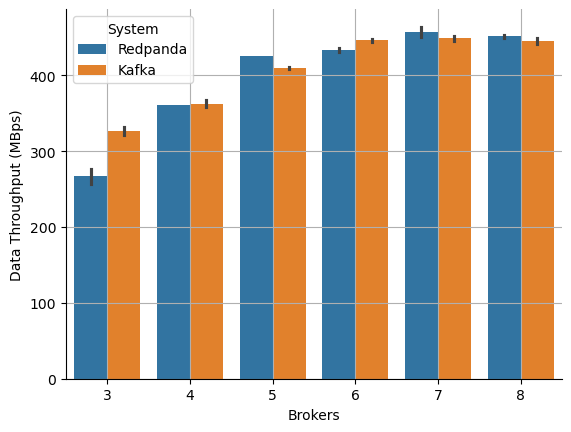

In [4]:
plot_throughput_vs_replicas(df)